<a href="https://colab.research.google.com/github/MonteiroAlvesMatheus/TCC/blob/main/C%C3%B3pia_de_Deteccao_Doencas_Cardiacas_Resnet_Enio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuração Computador Colab

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.140
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

In [ ]:
!nvidia-smi

Mon Aug 14 01:52:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Bibliotecas

In [ ]:
# instalando o a biblioteca pydicom
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.6 MB/s eta 0:00:00


In [ ]:
#importando as bibliotecas
import pandas as pd
import os
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import subprocess
from PIL import Image
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from tensorflow.keras.metrics import CategoricalAccuracy, AUC, Precision, Recall
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score
import random

In [ ]:
!python -V

Python 3.10.12


In [ ]:
!pip show tensorflow
!pip show keras
!pip show matplotlib
!pip show seaborn
!pip show numpy
!pip show pandas


Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl
Name: keras
Version: 2.12.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow
Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python

In [ ]:
print(sklearn.__version__)
print(cv2.__version__)

1.2.2
4.8.0


In [ ]:
gpu_available = tf.config.list_physical_devices('GPU')

if len(gpu_available) > 0:
    print('GPU disponível')
    gpu_info = tf.config.list_physical_devices('GPU')
    print(gpu_info)
else:
    print('Nenhuma GPU disponível')

GPU disponível
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Conjunto de Dados

https://www.cardiacatlas.org/sunnybrook-cardiac-data/


## Baixando e Descompactando o Conjunto de Dados

In [ ]:
# #baixando o banco de dados
# !wget --no-check-certificate -O ds-parte1.zip 'https://www.cardiacatlas.org/share/download.php?id=89&token=z8AjLvYk8PxbVzfoPzxGuy7AupIoD2PY&download' #19 casos
# !wget --no-check-certificate -O ds-parte2.zip 'https://www.cardiacatlas.org/share/download.php?id=90&token=2HmYTa1kwKKLRLk6vFhfQg43fideQ2Ba&download'  #26 casos
# !wget --no-check-certificate -O dadopaciente.csv 'https://www.cardiacatlas.org/share/download.php?id=66&token=Y1D66ieUdbXFlqmZ4icHJheJy44MXUPY&download'  #rótulo do banco de dados

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mydrive = '/content/drive/Shareddrives/MachineLearning/DataSets/Cardio/TCCMatheus'

In [ ]:
#descompactando o banco de dados
!unzip {mydrive}"/ds-parte1.zip"
!unzip {mydrive}"/ds-parte2.zip"

A saída de streaming foi truncada nas últimas 5000 linhas.
   creating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-38/
  inflating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-38/CAP_SCD0004201_MR__hrt_raw_20120813124049187_3.dcm  
  inflating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-38/SCD0004201.log  
   creating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-44/
  inflating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-44/CAP_SCD0004201_MR__hrt_raw_20120813124049210_4.dcm  
  inflating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-44/SCD0004201.log  
   creating: SCD0004201/3.276_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSRfwuO3ZLEpPqrg3VQX9CQFKPIdx8Vg6I_+x_-x_256_256_-51/


## Classificação do Conjunto de Dados

In [ ]:
df_treino = pd.read_csv(f'{mydrive}/df_treino.csv')
df_treino

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
0,SCD0000201,/content/SCD0000201/3.276_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120643469_1...,-x-z,256x256,Infarto
1,SCD0000201,/content/SCD0000201/3.276_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120643444_1...,-x-z,256x256,Infarto
2,SCD0000201,/content/SCD0000201/3.276_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120643455_1...,-x-z,256x256,Infarto
3,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120632795_3...,-x-z,256x256,Infarto
4,SCD0000201,/content/SCD0000201/1.544_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000201_MR__hrt_raw_20120813120632875_3...,-x-z,256x256,Infarto
...,...,...,...,...,...,...
13884,SCD0004401,/content/SCD0004401/1.416_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124234255_7...,-x-z,256x256,Normal
13885,SCD0004401,/content/SCD0004401/1.416_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124234158_6...,-x-z,256x256,Normal
13886,SCD0004401,/content/SCD0004401/1.416_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004401_MR__hrt_raw_20120813124234235_6...,-x-z,256x256,Normal
13887,SCD0004401,/content/SCD0004401/1.7_2YMAJdAczcjAfXpHFLC6Zj...,CAP_SCD0004401_MR__hrt_raw_20120813124221923_3...,-x-z,256x256,Normal


In [ ]:
df_teste = pd.read_csv(f'{mydrive}/df_teste.csv')
df_teste

,ID Paciente,Caminho das imagens,Nome das imagens,Orientação,Dimensão,Classe
0,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600555_1...,-x-z,256x256,Infarto
1,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600579_1...,-x-z,256x256,Infarto
2,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600640_1...,-x-z,256x256,Infarto
3,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600622_1...,-x-z,256x256,Infarto
4,SCD0000101,/content/SCD0000101/1.512_29sSOG9riFiQfXpHFLC6...,CAP_SCD0000101_MR__hrt_raw_20120813120600599_1...,-x-z,256x256,Infarto
...,...,...,...,...,...,...
2625,SCD0004501,/content/SCD0004501/1.484_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124313381_1...,-x-z,256x256,Normal
2626,SCD0004501,/content/SCD0004501/1.484_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124313220_1...,-x-z,256x256,Normal
2627,SCD0004501,/content/SCD0004501/1.484_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124313651_1...,-x-z,256x256,Normal
2628,SCD0004501,/content/SCD0004501/1.216_2YMAJdAczcjAfXpHFLC6...,CAP_SCD0004501_MR__hrt_raw_20120813124305635_2...,-x-z,256x256,Normal


In [ ]:
end_imgs = df_treino['Caminho das imagens'].iloc[1000]
print(end_imgs)
imagens = cv2.imread(end_imgs)
imagens

/content/SCD0000301/1.676_2YMAJdAczcjAfXpHFLC6Zj453OlBWiLWSc9C_O76mek1iEoCm5F8Z6VKPIdx8Vg6I_-x_-z_256_256_67/CAP_SCD0000301_MR__hrt_raw_20120813120703319_109.dcm


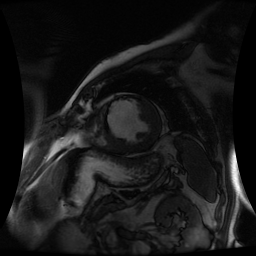

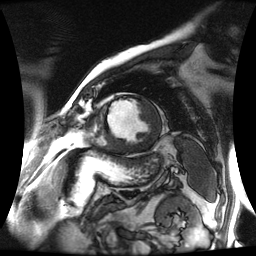

In [ ]:
from google.colab.patches import cv2_imshow
import pydicom as dicom
ds=dicom.dcmread(end_imgs)
dcm_sample=ds.pixel_array
cinza = np.uint8(dcm_sample/np.max(dcm_sample) * 255)
cv2_imshow(cinza)
cv2_imshow(dcm_sample)

In [ ]:
#Dataframe Treino
df_treino_fold1 = pd.read_csv(f'{mydrive}/Validação Cruzada/treino_fold1.csv')
df_treino_fold2 = pd.read_csv(f'{mydrive}/Validação Cruzada/treino_fold2.csv')
df_treino_fold3 = pd.read_csv(f'{mydrive}/Validação Cruzada/treino_fold3.csv')
df_treino_fold4 = pd.read_csv(f'{mydrive}/Validação Cruzada/treino_fold4.csv')

In [ ]:
df_treino = [df_treino_fold1,df_treino_fold2,df_treino_fold3,df_treino_fold4]

In [ ]:
#Dataframe Validação Cruzada
df_fold1 = pd.read_csv(f'{mydrive}/Validação Cruzada/fold1.csv')
df_fold2 = pd.read_csv(f'{mydrive}/Validação Cruzada/fold2.csv')
df_fold3 = pd.read_csv(f'{mydrive}/Validação Cruzada/fold3.csv')
df_fold4 = pd.read_csv(f'{mydrive}/Validação Cruzada/fold4.csv')

In [ ]:
df_validacao = [df_fold1,df_fold2,df_fold3,df_fold4]

In [ ]:
def batch_generator(df, batch_size, _mode, label_set, tam_img):
      while True:
          # Depending on mode select DataFrame with paths
          if _mode == 'train':
              ids = random.sample(range(df.shape[0]), df.shape[0])
          elif _mode == 'val':
              ids = list(range(df.shape[0]))
          else:
              raise ValueError('The mode should be either train or val.')

          # Create batches (for training data the batches are randomly permuted)
          for start in range(0, len(ids), batch_size):
              X_batch = []
              y_batch = []
              end = min(start + batch_size, len(ids))
              i_batch = ids[start:end]
              for i in i_batch:
                  end_imgs = df['Caminho das imagens'].iloc[i]
                  ds=dicom.dcmread(end_imgs)
                  dcm_sample=ds.pixel_array
                  X_batch.append(np.float32(dcm_sample/np.max(dcm_sample)))
                  y_batch.append(label_set[df['Classe'].iloc[i]])
              X_batch = np.array(X_batch)
              X_batch = np.reshape(X_batch, (X_batch.shape[0],tam_img, tam_img, 1)) #corrigindo a dimensão da imagem pra 256x256x1

              y_batch = np_utils.to_categorical(y_batch, num_classes = len(label_set))
              yield (X_batch, y_batch)

In [ ]:
rotulo = {'Infarto': 0, 'Insuficiencia': 1, 'Hipertrofia': 2, 'Normal': 3}

In [ ]:
batch_size = 16
tam_img = 256

# Modelo + Treinamento

In [ ]:
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
# import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAvgPool2D, AveragePooling2D
from keras.layers import add as keraslayersadd
from keras.regularizers import l2
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from tensorflow.keras.utils import plot_model

In [ ]:
"""ResNet15 model for Keras.

# Reference:

- [Deep Residual Learning for Image Recognition](
    https://arxiv.org/abs/1512.03385) (CVPR 2016 Best Paper Award)

Adapted from code contributed by BigMoyan.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import warnings

from keras import models
from keras import layers
from keras.regularizers import l2

def identity_block(input_tensor, kernel_size, filters, stage, block, dilation):
    """The identity block is the block that has no conv layer at shortcut.

    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names

    # Returns
        Output tensor for the block.
    """
    filters1, filters2, filters3 = filters
    bn_axis = 3
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(filters1, kernel_size,
                      padding='same',
                      dilation_rate=(int(2**(dilation // 3)),int(2**(dilation // 3))),
                      use_bias=False,
                      activation='relu',
                      kernel_regularizer=l2(1e-5),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)

    x = layers.Conv2D(filters2, kernel_size,
                      padding='same',
                      dilation_rate=(int(2**((dilation+1) // 3)),int(2**((dilation+1) // 3))),
                      use_bias=False,
                      activation='relu',
                      kernel_regularizer=l2(1e-5),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)

    x = layers.add([x, input_tensor])
    return x


def ResNet15Dilation(include_top=True,
             input_tensor=None,
             input_shape=(256,256,1),
             pooling=None,
             classes=3,
             **kwargs):
    """Instantiates the ResNet50 architecture.

    # Returns
        A Keras model instance.

    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
    """
    global backend, layers, models, keras_utils

    img_input = layers.Input(shape=input_shape)
    bn_axis = 3

    # x = layers.Conv2D(1, (49, 49),
    #                   strides=(1, 1),
    #                   # padding='valid',
    #                   padding='same',
    #                   activation=None,
    #                   kernel_regularizer=l2(1e-5),
    #                   kernel_initializer='he_normal',
    #                   name='conv_combLin')(img_input)

    x = layers.Conv2D(32, (3, 3),
                      strides=(1, 1),
                      # padding='valid',
                      padding='same',
                      activation='relu',
                      kernel_regularizer=l2(1e-5),
                      kernel_initializer='he_normal',
                      name='conv1')(img_input)
    # x = layers.MaxPooling2D((3, 3), strides=(1, 1))(x)

    x = identity_block(x, 3, [32, 32, 32], stage=1, block='a', dilation=0)
    x = identity_block(x, 3, [32, 32, 32], stage=2, block='b', dilation=0)
    x = identity_block(x, 3, [32, 32, 32], stage=3, block='c', dilation=0)
    x = identity_block(x, 3, [32, 32, 32], stage=4, block='d', dilation=0)
    x = identity_block(x, 3, [32, 32, 32], stage=5, block='e', dilation=0)
    x = identity_block(x, 3, [32, 32, 32], stage=6, block='f', dilation=0)
    x = identity_block(x, 3, [32, 32, 32], stage=7, block='g', dilation=0)
    x = identity_block(x, 3, [32, 32, 32], stage=8, block='h', dilation=0)
    x = identity_block(x, 3, [32, 32, 32], stage=9, block='i', dilation=0)
    x = identity_block(x, 3, [32, 32, 32], stage=10, block='j', dilation=0)
    x = identity_block(x, 3, [32, 32, 32], stage=11, block='k', dilation=0)
    x = identity_block(x, 3, [32, 32, 32], stage=12, block='l', dilation=0)

    if include_top:
        x = layers.Conv2D(32, (3, 3),
                          strides=(1, 1),
                          dilation_rate=(32,32),
                          padding='same',
                          activation='relu',
                          kernel_regularizer=l2(1e-5),
                          kernel_initializer='he_normal',
                          name='lastconv')(x)
        x = layers.BatchNormalization(axis=bn_axis, name='bn_lastconv')(x)

        x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
        x = layers.Dense(classes, activation='softmax', name='fc35')(x)
    else:
        if pooling == 'avg':
            x = layers.GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = layers.GlobalMaxPooling2D()(x)
        else:
            warnings.warn('The output shape of `ResNet50(include_top=False)` '
                          'has been changed since Keras 2.2.0.')

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    inputs = img_input
    # Create model.
    model = models.Model(inputs, x, name='resnet15')

    return model

In [ ]:
#INPUT_SHAPE = (np.array(data_train).shape)
INPUT_SHAPE = (256,256,1)
# NUM_CLASSES = len(LABELS)
#LABELS = 'yes no up down left right on off stop go unknown sil'.split()
#NUM_CLASSES = len(df_train['label'].unique())
NUM_CLASSES = 4

print(f'Número de Classes: {NUM_CLASSES}')
print(f'Formato da entrada {INPUT_SHAPE}')

Número de Classes: 4
Formato da entrada (256, 256, 1)


In [ ]:
model = ResNet15Dilation(include_top=True,
             input_tensor=None,
             input_shape=INPUT_SHAPE,
             pooling=None,
             classes=NUM_CLASSES)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
metricasEscolhidas = [CategoricalAccuracy(name='acc'),
                      AUC(name='auc'),
                      Precision(name='precision'),
                      Recall(name='recall')]

In [ ]:
# compila do modelo
model.compile(optimizer= opt,
              loss='categorical_crossentropy',
              metrics=metricasEscolhidas)

In [ ]:
model.summary()

Model: "resnet15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 256, 256, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 res1a_branch2a (Conv2D)        (None, 256, 256, 32  9216        ['conv1[0][0]']                  
                                )                                                          

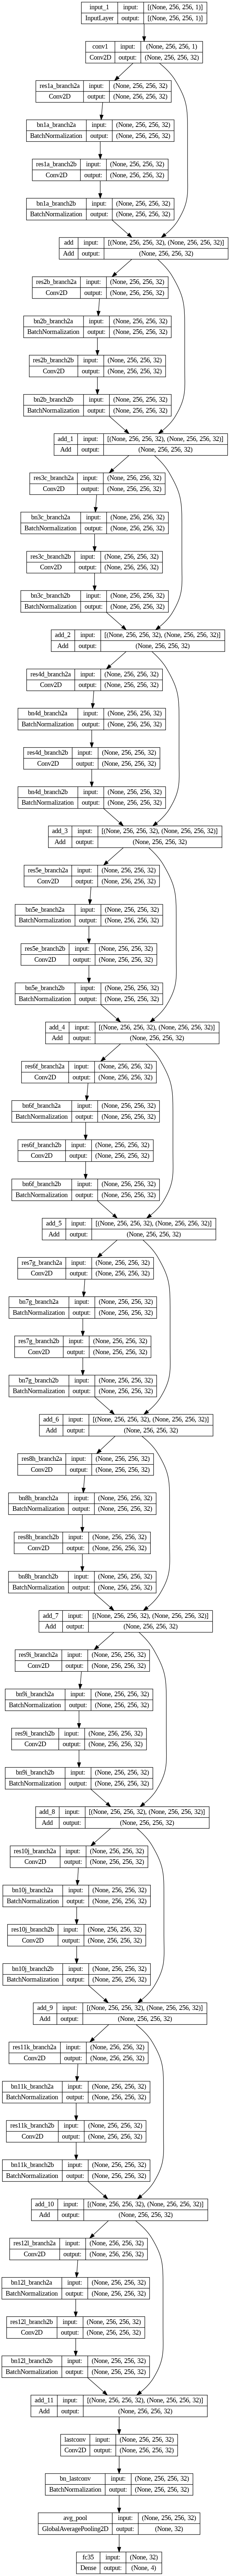

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history_all=[]

In [ ]:
N=4
model_path=f'{mydrive}/saved_models/'
es = EarlyStopping(monitor='val_loss', verbose=1, patience=8)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=4, min_lr=1e-10)
R=4
for r in range(R):
  for ival in range(N):
      df_val = df_validacao[ival]
      df_train = df_treino[ival]

      checkpoint = ModelCheckpoint(f'{model_path}'+f'R{r}V{ival}_'+'model-{epoch:03d}_epc3.h5', monitor = 'val_loss',verbose=1,save_best_only=True,mode='auto',save_weights_only=True)
      callbacks_list = [checkpoint,es,reduce_lr]

      history = model.fit(batch_generator(df_train, batch_size, _mode='train', label_set=rotulo, tam_img=tam_img),
                          steps_per_epoch=int(np.ceil(len(df_train)/batch_size)),
                          epochs=3, verbose=1,
                          callbacks=callbacks_list,
                          shuffle=True,
                          # workers=2,
                          validation_data=batch_generator(df_val, batch_size, _mode='val', label_set=rotulo, tam_img=tam_img),
                          validation_steps=int(np.ceil(len(df_val)/batch_size))
                        )
      history_all.append(history)
      model.save(f'{model_path}'+f'R{r}V{ival}_'+'model-Final_epc3.h5')

Epoch 1/3
731/731 [==============================] - ETA: 0s - loss: 0.8795 - acc: 0.6561 - auc: 0.8778 - precision: 0.7701 - recall: 0.5090
Epoch 1: val_loss improved from inf to 1.47064, saving model to /content/drive/Shareddrives/MachineLearning/DataSets/Cardio/TCCMatheus/saved_models/R0V0_model-001_epc3.h5
731/731 [==============================] - 639s 874ms/step - loss: 0.8795 - acc: 0.6561 - auc: 0.8778 - precision: 0.7701 - recall: 0.5090 - val_loss: 1.4706 - val_acc: 0.5002 - val_auc: 0.7631 - val_precision: 0.5249 - val_recall: 0.4594 - lr: 0.0100
Epoch 2/3
731/731 [==============================] - ETA: 0s - loss: 0.3371 - acc: 0.9116 - auc: 0.9858 - precision: 0.9291 - recall: 0.8941
Epoch 2: val_loss improved from 1.47064 to 1.26718, saving model to /content/drive/Shareddrives/MachineLearning/DataSets/Cardio/TCCMatheus/saved_models/R0V0_model-002_epc3.h5
731/731 [==============================] - 644s 881ms/step - loss: 0.3371 - acc: 0.9116 - auc: 0.9858 - precision: 0.929

In [ ]:
# R3V3_model-001_epc3

In [ ]:
stoped_epoch = '001'
# initial_epoch = int(stoped_epoch)+1
model_path_load = f'{mydrive}/saved_models/R3V3_model-{stoped_epoch}_epc3.h5'
model_path_load = model_path_load.replace(" ","\ ")
model_namepath = !ls {model_path_load}
print(model_namepath)

['/content/drive/Shareddrives/MachineLearning/DataSets/Cardio/TCCMatheus/saved_models/R3V3_model-001_epc3.h5']


In [ ]:
model_namepath = model_namepath[-1].replace("'","")
print(model_namepath)
!cp {model_namepath.replace(" ","\ ")} localmodel.h5
# local_model = model_namepath.split('/')[-1]
local_model = 'localmodel.h5'

/content/drive/Shareddrives/MachineLearning/DataSets/Cardio/TCCMatheus/saved_models/R3V3_model-001_epc3.h5


In [ ]:
from keras.models import load_model
model.load_weights(local_model, by_name=True)
# model = load_model(local_model)
model.summary()

Model: "resnet15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 256, 256, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 res1a_branch2a (Conv2D)        (None, 256, 256, 32  9216        ['conv1[0][0]']                  
                                )                                                          

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
metricasEscolhidas = [CategoricalAccuracy(name='acc'),
                      AUC(name='auc'),
                      Precision(name='precision'),
                      Recall(name='recall')]

In [ ]:
# compila do modelo
model.compile(optimizer= opt,
              loss='categorical_crossentropy',
              metrics=metricasEscolhidas)

# Preparação do Conjunto de Teste

In [ ]:
tam_img=256

In [ ]:
data_teste=[]
target_teste=[]

for n in range(len(df_teste)):
  end_imgs = df_teste['Caminho das imagens'].iloc[n]
  ds=dicom.dcmread(end_imgs)
  dcm_sample=ds.pixel_array
  data_teste.append(np.float32(dcm_sample/np.max(dcm_sample))) #Normalizado entre 0 e 1
  target_teste.append(rotulo[df_teste['Classe'].iloc[n]]) #rotulando as imagens de acordo com as classes

In [ ]:
data_teste = np.array(data_teste)
data_teste = np.reshape(data_teste, (data_teste.shape[0],tam_img,tam_img,1)) #corrigindo a dimensão da imagem pra 256x256x1
target_teste = np.array(target_teste)
target_teste= np_utils.to_categorical(target_teste)

# Carregar e Testar o Melhor Modelo segundo Val_loss

In [ ]:
# R3V3_model-001_epc3

In [ ]:
stoped_epoch = '001'
# initial_epoch = int(stoped_epoch)+1
model_path_load = f'{mydrive}/saved_models/R3V3_model-{stoped_epoch}_epc3.h5'
model_path_load = model_path_load.replace(" ","\ ")
model_namepath = !ls {model_path_load}
print(model_namepath)

In [ ]:
model_namepath = model_namepath[-1].replace("'","")
print(model_namepath)
!cp {model_namepath.replace(" ","\ ")} localmodel.h5
# local_model = model_namepath.split('/')[-1]
local_model = 'localmodel.h5'

In [ ]:
from keras.models import load_model
model.load_weights(local_model, by_name=True)
# model = load_model(local_model)
model.summary()

In [ ]:
model.evaluate(data_teste,target_teste)

83/83 [==============================] - 34s 378ms/step - loss: 4.8911 - acc: 0.2973 - auc: 0.5612 - precision: 0.2982 - recall: 0.2901


[4.891078948974609,
 0.2973383963108063,
 0.5611906051635742,
 0.29816335439682007,
 0.29011407494544983]

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(data_teste)

y_true = [np.argmax(y, axis=None, out=None) for y in target_teste]
y_true = np.array(y_true)

y_hat = [np.argmax(y, axis=None, out=None) for y in y_pred]
y_hat = np.array(y_hat)

confusion = confusion_matrix(y_true, y_hat)


83/83 [==============================] - 32s 377ms/step


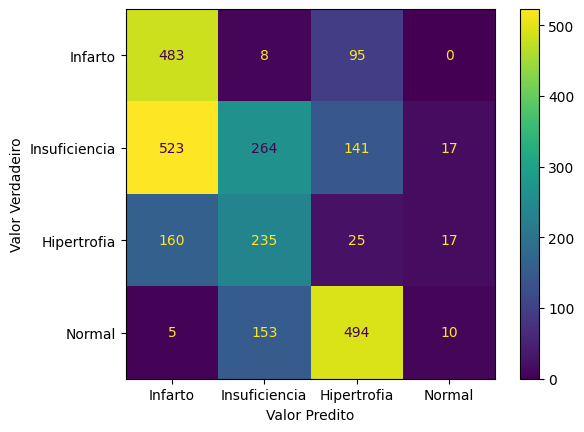

In [ ]:
ConfusionMatrixDisplay(confusion, display_labels=rotulo).plot()
plt.grid(False)
plt.xlabel("Valor Predito")
plt.ylabel("Valor Verdadeiro")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_hat, digits=4))

              precision    recall  f1-score   support

           0     0.4125    0.8242    0.5498       586
           1     0.4000    0.2794    0.3290       945
           2     0.0331    0.0572    0.0419       437
           3     0.2273    0.0151    0.0283       662

    accuracy                         0.2973      2630
   macro avg     0.2682    0.2940    0.2373      2630
weighted avg     0.2983    0.2973    0.2548      2630



In [ ]:
# R3V1_model-001_epc3

In [ ]:
R=3
V=0
stoped_epoch = '001'

In [ ]:
# initial_epoch = int(stoped_epoch)+1
model_path_load = f'{mydrive}/saved_models/R{R}V{V}_model-{stoped_epoch}_epc3.h5'
model_path_load = model_path_load.replace(" ","\ ")
model_namepath = !ls {model_path_load}
print(model_namepath)

['/content/drive/Shareddrives/MachineLearning/DataSets/Cardio/TCCMatheus/saved_models/R3V0_model-001_epc3.h5']


In [ ]:
model_namepath = model_namepath[-1].replace("'","")
print(model_namepath)
!cp {model_namepath.replace(" ","\ ")} localmodel.h5
# local_model = model_namepath.split('/')[-1]
local_model = 'localmodel.h5'

/content/drive/Shareddrives/MachineLearning/DataSets/Cardio/TCCMatheus/saved_models/R3V0_model-001_epc3.h5


In [ ]:
from keras.models import load_model
model.load_weights(local_model, by_name=True)
# model = load_model(local_model)
model.summary()

Model: "resnet15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 256, 256, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 res1a_branch2a (Conv2D)        (None, 256, 256, 32  9216        ['conv1[0][0]']                  
                                )                                                          

In [ ]:
model.evaluate(data_teste,target_teste)

83/83 [==============================] - 41s 390ms/step - loss: 6.1397 - acc: 0.3171 - auc: 0.5690 - precision: 0.3164 - recall: 0.3133


[6.139662265777588,
 0.3171102702617645,
 0.5690194964408875,
 0.3164362609386444,
 0.3133079707622528]

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(data_teste)

y_true = [np.argmax(y, axis=None, out=None) for y in target_teste]
y_true = np.array(y_true)

y_hat = [np.argmax(y, axis=None, out=None) for y in y_pred]
y_hat = np.array(y_hat)

confusion = confusion_matrix(y_true, y_hat)


83/83 [==============================] - 34s 400ms/step


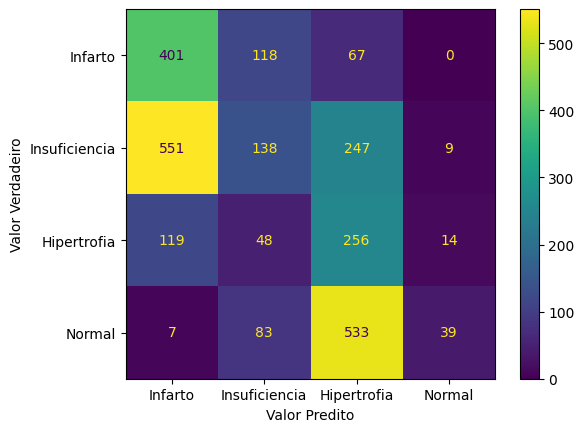

In [ ]:
ConfusionMatrixDisplay(confusion, display_labels=rotulo).plot()
plt.grid(False)
plt.xlabel("Valor Predito")
plt.ylabel("Valor Verdadeiro")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_hat, digits=4))

              precision    recall  f1-score   support

           0     0.3720    0.6843    0.4820       586
           1     0.3566    0.1460    0.2072       945
           2     0.2321    0.5858    0.3325       437
           3     0.6290    0.0589    0.1077       662

    accuracy                         0.3171      2630
   macro avg     0.3974    0.3688    0.2823      2630
weighted avg     0.4079    0.3171    0.2642      2630



In [ ]:
# R3V1_model-001_epc3

In [ ]:
R=3
V=1
stoped_epoch = '001'

In [ ]:
# initial_epoch = int(stoped_epoch)+1
model_path_load = f'{mydrive}/saved_models/R{R}V{V}_model-{stoped_epoch}_epc3.h5'
model_path_load = model_path_load.replace(" ","\ ")
model_namepath = !ls {model_path_load}
print(model_namepath)

['/content/drive/Shareddrives/MachineLearning/DataSets/Cardio/TCCMatheus/saved_models/R3V1_model-001_epc3.h5']


In [ ]:
model_namepath = model_namepath[-1].replace("'","")
print(model_namepath)
!cp {model_namepath.replace(" ","\ ")} localmodel.h5
# local_model = model_namepath.split('/')[-1]
local_model = 'localmodel.h5'

/content/drive/Shareddrives/MachineLearning/DataSets/Cardio/TCCMatheus/saved_models/R3V1_model-001_epc3.h5


In [ ]:
from keras.models import load_model
model.load_weights(local_model, by_name=True)
# model = load_model(local_model)
model.summary()

Model: "resnet15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 256, 256, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 res1a_branch2a (Conv2D)        (None, 256, 256, 32  9216        ['conv1[0][0]']                  
                                )                                                          

In [ ]:
model.evaluate(data_teste,target_teste)

83/83 [==============================] - 31s 376ms/step - loss: 4.9009 - acc: 0.2681 - auc: 0.5283 - precision: 0.2673 - recall: 0.2608


[4.900908470153809,
 0.2680608332157135,
 0.528337836265564,
 0.2673421800136566,
 0.26083651185035706]

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(data_teste)

y_true = [np.argmax(y, axis=None, out=None) for y in target_teste]
y_true = np.array(y_true)

y_hat = [np.argmax(y, axis=None, out=None) for y in y_pred]
y_hat = np.array(y_hat)

confusion = confusion_matrix(y_true, y_hat)


83/83 [==============================] - 31s 377ms/step


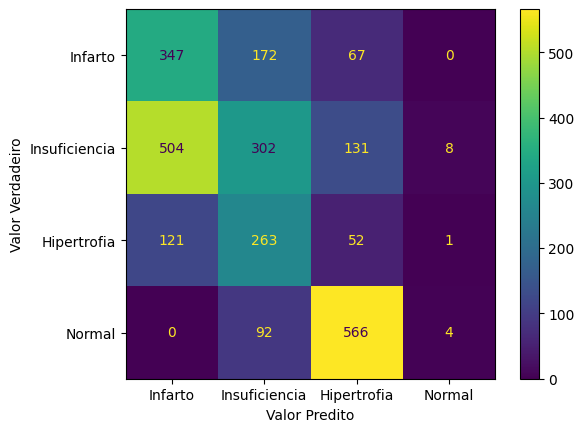

In [ ]:
ConfusionMatrixDisplay(confusion, display_labels=rotulo).plot()
plt.grid(False)
plt.xlabel("Valor Predito")
plt.ylabel("Valor Verdadeiro")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_hat, digits=4))

              precision    recall  f1-score   support

           0     0.3570    0.5922    0.4454       586
           1     0.3643    0.3196    0.3405       945
           2     0.0637    0.1190    0.0830       437
           3     0.3077    0.0060    0.0119       662

    accuracy                         0.2681      2630
   macro avg     0.2732    0.2592    0.2202      2630
weighted avg     0.2985    0.2681    0.2384      2630



In [ ]:
# R3V1_model-001_epc3

In [ ]:
R=3
V=2
stoped_epoch = '001'

In [ ]:
# initial_epoch = int(stoped_epoch)+1
model_path_load = f'{mydrive}/saved_models/R{R}V{V}_model-{stoped_epoch}_epc3.h5'
model_path_load = model_path_load.replace(" ","\ ")
model_namepath = !ls {model_path_load}
print(model_namepath)

['/content/drive/Shareddrives/MachineLearning/DataSets/Cardio/TCCMatheus/saved_models/R3V2_model-001_epc3.h5']


In [ ]:
model_namepath = model_namepath[-1].replace("'","")
print(model_namepath)
!cp {model_namepath.replace(" ","\ ")} localmodel.h5
# local_model = model_namepath.split('/')[-1]
local_model = 'localmodel.h5'

/content/drive/Shareddrives/MachineLearning/DataSets/Cardio/TCCMatheus/saved_models/R3V2_model-001_epc3.h5


In [ ]:
from keras.models import load_model
model.load_weights(local_model, by_name=True)
# model = load_model(local_model)
model.summary()

Model: "resnet15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 256, 256, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 res1a_branch2a (Conv2D)        (None, 256, 256, 32  9216        ['conv1[0][0]']                  
                                )                                                          

In [ ]:
model.evaluate(data_teste,target_teste)

83/83 [==============================] - 31s 376ms/step - loss: 4.5102 - acc: 0.3859 - auc: 0.6234 - precision: 0.3875 - recall: 0.3829


[4.510177135467529,
 0.3859315514564514,
 0.623416006565094,
 0.3874567151069641,
 0.3828897476196289]

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(data_teste)

y_true = [np.argmax(y, axis=None, out=None) for y in target_teste]
y_true = np.array(y_true)

y_hat = [np.argmax(y, axis=None, out=None) for y in y_pred]
y_hat = np.array(y_hat)

confusion = confusion_matrix(y_true, y_hat)


83/83 [==============================] - 31s 378ms/step


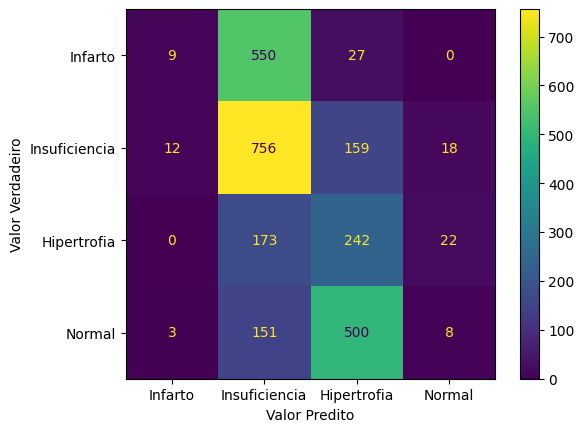

In [ ]:
ConfusionMatrixDisplay(confusion, display_labels=rotulo).plot()
plt.grid(False)
plt.xlabel("Valor Predito")
plt.ylabel("Valor Verdadeiro")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_hat, digits=4))

              precision    recall  f1-score   support

           0     0.3750    0.0154    0.0295       586
           1     0.4638    0.8000    0.5872       945
           2     0.2608    0.5538    0.3546       437
           3     0.1667    0.0121    0.0225       662

    accuracy                         0.3859      2630
   macro avg     0.3166    0.3453    0.2485      2630
weighted avg     0.3355    0.3859    0.2821      2630



In [ ]:
# R3V3_model-Final_epc3

In [ ]:
load_modelname = 'R3V3_model-Final_epc3.h5'
model_path_load = f'{mydrive}/saved_models/{load_modelname}'
model_path_load = model_path_load.replace(" ","\ ")
model_namepath = !ls {model_path_load}
print(model_namepath)

['/content/drive/Shareddrives/MachineLearning/DataSets/Cardio/TCCMatheus/saved_models/R3V3_model-Final_epc3.h5']


In [ ]:
model_namepath = model_namepath[-1].replace("'","")
print(model_namepath)

/content/drive/Shareddrives/MachineLearning/DataSets/Cardio/TCCMatheus/saved_models/R3V3_model-Final_epc3.h5


In [ ]:
new_model = tf.keras.models.load_model(model_namepath)

In [ ]:
new_model.evaluate(data_teste,target_teste)

83/83 [==============================] - 33s 376ms/step - loss: 6.8924 - acc: 0.2551 - auc: 0.4932 - precision: 0.2556 - recall: 0.2510


[6.892414569854736,
 0.25513309240341187,
 0.4932258725166321,
 0.25561580061912537,
 0.25095057487487793]

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = new_model.predict(data_teste)

y_true = [np.argmax(y, axis=None, out=None) for y in target_teste]
y_true = np.array(y_true)

y_hat = [np.argmax(y, axis=None, out=None) for y in y_pred]
y_hat = np.array(y_hat)

confusion = confusion_matrix(y_true, y_hat)


83/83 [==============================] - 31s 377ms/step


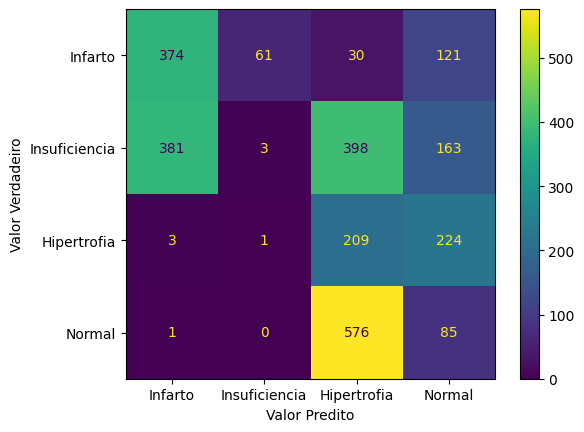

In [ ]:
ConfusionMatrixDisplay(confusion, display_labels=rotulo).plot()
plt.grid(False)
plt.xlabel("Valor Predito")
plt.ylabel("Valor Verdadeiro")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_hat, digits=4))

              precision    recall  f1-score   support

           0     0.4928    0.6382    0.5561       586
           1     0.0462    0.0032    0.0059       945
           2     0.1723    0.4783    0.2533       437
           3     0.1433    0.1284    0.1355       662

    accuracy                         0.2551      2630
   macro avg     0.2136    0.3120    0.2377      2630
weighted avg     0.1911    0.2551    0.2022      2630



In [ ]:
history_all

In [ ]:
history_all[0].history

{'loss': [0.8795304298400879, 0.3371473252773285, 0.2430819422006607],
 'acc': [0.656110942363739, 0.9115884900093079, 0.9446251392364502],
 'auc': [0.8777830600738525, 0.9857593178749084, 0.9930348992347717],
 'precision': [0.7701372504234314, 0.929117739200592, 0.953168511390686],
 'recall': [0.5089866518974304, 0.8941287398338318, 0.9371790289878845],
 'val_loss': [1.470638632774353, 1.2671757936477661, 2.0851192474365234],
 'val_acc': [0.5002267360687256, 0.5387755036354065, 0.5664399266242981],
 'val_auc': [0.763100266456604, 0.8041235208511353, 0.7986305356025696],
 'val_precision': [0.5248704552650452, 0.5784260034561157, 0.5753424763679504],
 'val_recall': [0.4594104290008545, 0.47664397954940796, 0.5523809790611267],
 'lr': [0.01, 0.01, 0.01]}

In [ ]:
for i in range(len(history_all)):
  print(f'Resultado para rodada {i}')
  print(history_all[i].history)

Resultado para rodada 0
{'loss': [0.8795304298400879, 0.3371473252773285, 0.2430819422006607], 'acc': [0.656110942363739, 0.9115884900093079, 0.9446251392364502], 'auc': [0.8777830600738525, 0.9857593178749084, 0.9930348992347717], 'precision': [0.7701372504234314, 0.929117739200592, 0.953168511390686], 'recall': [0.5089866518974304, 0.8941287398338318, 0.9371790289878845], 'val_loss': [1.470638632774353, 1.2671757936477661, 2.0851192474365234], 'val_acc': [0.5002267360687256, 0.5387755036354065, 0.5664399266242981], 'val_auc': [0.763100266456604, 0.8041235208511353, 0.7986305356025696], 'val_precision': [0.5248704552650452, 0.5784260034561157, 0.5753424763679504], 'val_recall': [0.4594104290008545, 0.47664397954940796, 0.5523809790611267], 'lr': [0.01, 0.01, 0.01]}
Resultado para rodada 1
{'loss': [0.2548747956752777, 0.19810330867767334, 0.1794733852148056], 'acc': [0.9424505233764648, 0.9581859707832336, 0.9652581214904785], 'auc': [0.9923163056373596, 0.9961130619049072, 0.99665421

In [ ]:
for i in range(len(history_all)):
  print(history_all[i].history['val_acc'])

[0.5002267360687256, 0.5387755036354065, 0.5664399266242981]
[0.6072953343391418, 0.7000387907028198, 0.44819557666778564]
[0.6732925772666931, 0.30632007122039795, 0.47706422209739685]
[0.5607385635375977, 0.6132166981697083, 0.6039844751358032]
[0.7777777910232544, 0.7365079522132874, 0.6698412895202637]
[0.8626309633255005, 0.6992627382278442, 0.6631742119789124]
[0.6738022565841675, 0.5682976841926575, 0.49388378858566284]
[0.647230327129364, 0.6778425574302673, 0.6686102747917175]
[0.8521541953086853, 0.7931972742080688, 0.6798185706138611]
[0.9161816239356995, 0.6639503240585327, 0.7714396715164185]
[0.6131498217582703, 0.7339449524879456, 0.567278265953064]
[0.9159377813339233, 0.6861029863357544, 0.6890184879302979]
[0.8857142925262451, 0.8104308247566223, 0.8485260605812073]
[0.9437330365180969, 0.8478851318359375, 0.8412883281707764]
[0.4694189727306366, 0.7415902018547058, 0.6967380046844482]
[0.9076773524284363, 0.5276967883110046, 0.5728862881660461]


In [ ]:
for i in range(len(history_all)):
  print(history_all[i].history['val_loss'])

[1.470638632774353, 1.2671757936477661, 2.0851192474365234]
[1.1864908933639526, 0.8646231889724731, 1.670974850654602]
[1.0714071989059448, 3.335512161254883, 2.532724142074585]
[2.1369664669036865, 1.3520238399505615, 1.0346338748931885]
[0.7464632987976074, 1.431645154953003, 1.1853561401367188]
[0.3816111385822296, 1.6385725736618042, 1.054297924041748]
[0.9941906332969666, 2.179673671722412, 2.53450345993042]
[1.4394694566726685, 1.1211910247802734, 4.711470127105713]
[0.7282969355583191, 0.7891266345977783, 1.8147915601730347]
[0.2670991122722626, 1.6483114957809448, 0.743163526058197]
[3.12233567237854, 0.9789139628410339, 1.959943413734436]
[0.33288583159446716, 6.116518974304199, 1.4663925170898438]
[0.3859958052635193, 0.7631279826164246, 0.49777916073799133]
[0.2106269747018814, 0.603164792060852, 0.9191348552703857]
[3.7352163791656494, 1.6338611841201782, 0.8774235844612122]
[0.3002570867538452, 4.437931537628174, 4.146548271179199]


In [ ]:
for i in range(len(history_all)):
  print(history_all[i].history['val_precision'])

[0.5248704552650452, 0.5784260034561157, 0.5753424763679504]
[0.6249496936798096, 0.7145732641220093, 0.4610215127468109]
[0.6937466859817505, 0.3094496428966522, 0.48304641246795654]
[0.5663011074066162, 0.6286579370498657, 0.6155007481575012]
[0.7850856781005859, 0.7402834892272949, 0.6814988255500793]
[0.8731726408004761, 0.706119179725647, 0.6666666865348816]
[0.7027027010917664, 0.5805774331092834, 0.502372145652771]
[0.6560951471328735, 0.6906693577766418, 0.6725403666496277]
[0.8598432540893555, 0.8012909293174744, 0.681693971157074]
[0.921646237373352, 0.6652360558509827, 0.7731225490570068]
[0.6171754002571106, 0.7615176439285278, 0.5850666761398315]
[0.9248895645141602, 0.692800760269165, 0.6984999775886536]
[0.8881788849830627, 0.8262888789176941, 0.8619070053100586]
[0.946999192237854, 0.8485792279243469, 0.8435797691345215]
[0.47462061047554016, 0.7477806806564331, 0.7013457417488098]
[0.908203125, 0.5280898809432983, 0.5770946741104126]


In [ ]:
for i in range(len(history_all)):
  print(history_all[i].history['val_auc'])

[0.763100266456604, 0.8041235208511353, 0.7986305356025696]
[0.8783274292945862, 0.9155566096305847, 0.7248218059539795]
[0.8941659331321716, 0.6150374412536621, 0.7439271211624146]
[0.7714781761169434, 0.8758385181427002, 0.8982260227203369]
[0.9430823922157288, 0.8775812387466431, 0.8812551498413086]
[0.9854679703712463, 0.8487681150436401, 0.9108884930610657]
[0.9010316729545593, 0.8127985000610352, 0.7302253842353821]
[0.8634732961654663, 0.895540714263916, 0.8078291416168213]
[0.9460741281509399, 0.9413851499557495, 0.8574768304824829]
[0.9906516671180725, 0.8571056127548218, 0.9441788196563721]
[0.778080940246582, 0.9155077338218689, 0.7941134572029114]
[0.9884416460990906, 0.8033711314201355, 0.8793679475784302]
[0.9801821708679199, 0.9510805010795593, 0.9699607491493225]
[0.994634211063385, 0.96055668592453, 0.9471228122711182]
[0.6650795936584473, 0.8885287046432495, 0.921194314956665]
[0.9898052215576172, 0.7302231192588806, 0.7456701993942261]


In [ ]:
for i in range(len(history_all)):
  print(history_all[i].history['val_recall'])

[0.4594104290008545, 0.47664397954940796, 0.5523809790611267]
[0.6026387214660645, 0.6887854337692261, 0.3993014991283417]
[0.6615698337554932, 0.3037716746330261, 0.4719673693180084]
[0.5519922375679016, 0.6054421663284302, 0.5942662954330444]
[0.7687074542045593, 0.7342403531074524, 0.6598639488220215]
[0.8575863242149353, 0.6806364059448242, 0.6589056849479675]
[0.6625891923904419, 0.5637105107307434, 0.4857288599014282]
[0.6433430314064026, 0.6618075966835022, 0.6676384806632996]
[0.8458049893379211, 0.7882086038589478, 0.678911566734314]
[0.9037640690803528, 0.6616220474243164, 0.7590221166610718]
[0.6080530285835266, 0.7161059975624084, 0.5591233372688293]
[0.9154518842697144, 0.6827016472816467, 0.6788144111633301]
[0.882539689540863, 0.8068027496337891, 0.8321995735168457]
[0.9429569244384766, 0.845944881439209, 0.8412883281707764]
[0.4622833728790283, 0.7298674583435059, 0.6906217932701111]
[0.9037901163101196, 0.5252672433853149, 0.565597653388977]


In [ ]:
for i in range(len(history_all)):
  print(history_all[i].history['acc'])

[0.656110942363739, 0.9115884900093079, 0.9446251392364502]
[0.9424505233764648, 0.9581859707832336, 0.9652581214904785]
[0.9677202701568604, 0.9724155068397522, 0.9737570285797119]
[0.966528594493866, 0.9734595417976379, 0.973628580570221]
[0.9754365086555481, 0.9768058657646179, 0.9762923717498779]
[0.971269428730011, 0.9786952137947083, 0.9769271612167358]
[0.9826444387435913, 0.9819736480712891, 0.9817221164703369]
[0.9745583534240723, 0.9797143340110779, 0.9805595278739929]
[0.9768058657646179, 0.9851934313774109, 0.9842519760131836]
[0.979667603969574, 0.9801980257034302, 0.982496440410614]
[0.9813867807388306, 0.9862496852874756, 0.9830636382102966]
[0.9801369309425354, 0.986138105392456, 0.9819118976593018]
[0.9846798777580261, 0.9844231605529785, 0.9799726009368896]
[0.9820544719696045, 0.9867397546768188, 0.9846181273460388]
[0.9863335490226746, 0.9875912070274353, 0.9865012168884277]
[0.9851238131523132, 0.9847012162208557, 0.9847857356071472]


In [ ]:
for i in range(len(history_all)):
  print(history_all[i].history['loss'])

[0.8795304298400879, 0.3371473252773285, 0.2430819422006607]
[0.2548747956752777, 0.19810330867767334, 0.1794733852148056]
[0.1730007827281952, 0.1496468186378479, 0.14633025228977203]
[0.17265170812606812, 0.1469617336988449, 0.14738066494464874]
[0.1374160647392273, 0.12884318828582764, 0.13753557205200195]
[0.15182313323020935, 0.12353511154651642, 0.13135068118572235]
[0.11196714639663696, 0.1108274832367897, 0.11045675724744797]
[0.13547538220882416, 0.11374133080244064, 0.1156521737575531]
[0.12722724676132202, 0.09990584850311279, 0.10724124312400818]
[0.11683881282806396, 0.1120581403374672, 0.10646925866603851]
[0.10921959578990936, 0.09235464036464691, 0.10577486455440521]
[0.11937883496284485, 0.09474638104438782, 0.1086285263299942]
[0.1045677438378334, 0.09463666379451752, 0.11476973444223404]
[0.11504301428794861, 0.08879229426383972, 0.0960722491145134]
[0.09374701976776123, 0.09016474336385727, 0.09570488333702087]
[0.10012883692979813, 0.09482624381780624, 0.0965691283

In [ ]:
for i in range(len(history_all)):
  print(history_all[i].history['precision'])

[0.7701372504234314, 0.929117739200592, 0.953168511390686]
[0.9483917355537415, 0.963899552822113, 0.9700561165809631]
[0.9709606766700745, 0.9754740595817566, 0.9761563539505005]
[0.9693261981010437, 0.9759782552719116, 0.9762167930603027]
[0.977401614189148, 0.9798744320869446, 0.9788478016853333]
[0.973990261554718, 0.9805747866630554, 0.979310929775238]
[0.9844419956207275, 0.983596920967102, 0.9828614592552185]
[0.9777457118034363, 0.9818505644798279, 0.9817858338356018]
[0.9790378212928772, 0.9869561195373535, 0.9856725931167603]
[0.9810333847999573, 0.9819843769073486, 0.9839581847190857]
[0.9826861619949341, 0.987156867980957, 0.9842830896377563]
[0.9820308685302734, 0.9870437979698181, 0.9832345247268677]
[0.9857633113861084, 0.9855010509490967, 0.9809556603431702]
[0.9839524626731873, 0.9879518151283264, 0.9861738681793213]
[0.9874023795127869, 0.9883252382278442, 0.9874916076660156]
[0.9861864447593689, 0.9861946105957031, 0.9859440922737122]


In [ ]:
for i in range(len(history_all)):
  print(history_all[i].history['auc'])

[0.8777830600738525, 0.9857593178749084, 0.9930348992347717]
[0.9923163056373596, 0.9961130619049072, 0.996654212474823]
[0.996854841709137, 0.9975960850715637, 0.9977089762687683]
[0.996732771396637, 0.9973706007003784, 0.9977088570594788]
[0.9982292056083679, 0.9980855584144592, 0.9982431530952454]
[0.9973126649856567, 0.9983406066894531, 0.9982609152793884]
[0.9986258745193481, 0.998619556427002, 0.9988394379615784]
[0.9978376626968384, 0.9988332390785217, 0.9985228180885315]
[0.9981662631034851, 0.9989572763442993, 0.9987366199493408]
[0.9986780881881714, 0.9986757040023804, 0.9988294839859009]
[0.9986416101455688, 0.9993043541908264, 0.9988185167312622]
[0.9983771443367004, 0.9989709854125977, 0.9984580278396606]
[0.9989204406738281, 0.9991335272789001, 0.998660147190094]
[0.9981861710548401, 0.9994291663169861, 0.9991333484649658]
[0.9992436170578003, 0.999062180519104, 0.9988866448402405]
[0.9985904097557068, 0.9991376996040344, 0.998820960521698]


In [ ]:
for i in range(len(history_all)):
  print(history_all[i].history['recall'])

[0.5089866518974304, 0.8941287398338318, 0.9371790289878845]
[0.9357319474220276, 0.9535890817642212, 0.9622524976730347]
[0.9643665552139282, 0.9704033136367798, 0.9714093804359436]
[0.9642464518547058, 0.9718536138534546, 0.9714309573173523]
[0.9735535979270935, 0.9750941395759583, 0.9743238687515259]
[0.9699434041976929, 0.9772807359695435, 0.9749823212623596]
[0.9814705848693848, 0.980380654335022, 0.9808837175369263]
[0.9729524254798889, 0.978531002998352, 0.9795452356338501]
[0.9753509163856506, 0.984337568283081, 0.9833105206489563]
[0.9785183668136597, 0.978164792060852, 0.9814356565475464]
[0.980296790599823, 0.9859981536865234, 0.9818898439407349]
[0.9792916774749756, 0.9852083325386047, 0.9814893007278442]
[0.9837384223937988, 0.9831393361091614, 0.9786887764930725]
[0.981082022190094, 0.985855758190155, 0.9836456775665283]
[0.9857466220855713, 0.9865850806236267, 0.9862496852874756]
[0.9836024045944214, 0.9841940402984619, 0.9841940402984619]
